In [1]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

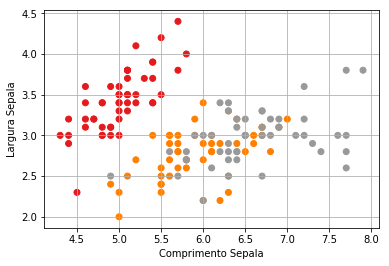

In [3]:
#Visualiza base de dados
X = iris.data[:, :2] #as duas primeiras características
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Comprimento Sepala')
plt.ylabel('Largura Sepala')
plt.grid(True)
plt.show()

In [4]:
dados = []
for i in range(len(iris['data'])):
    dados.append([list(iris['data'][i]), iris['target'][i]])

In [5]:
import knn

knn = knn.Knn(3)
knn.treina(dados[:40] + dados[51:90] + dados[101:140])

In [6]:
x_predito = numpy.concatenate([iris.data[40:50], iris.data[90:100], iris.data[140:150]])
y_valido = numpy.concatenate([iris.target[40:50], iris.target[90:100], iris.target[140:150]])
x_treino = numpy.concatenate([iris.data[:40], iris.data[51:90], iris.data[101:140]])
y_treino = numpy.concatenate([iris.target[:40], iris.target[51:90], iris.target[101:140]])

In [7]:
#Define o y_predito
aux = (dados[40:50] + dados[90:100] + dados[140:150])
y_predito = []
for i in range(len(aux)):
    y_predito.append(knn.prediz(aux[i]))
print(y_predito)
print(y_valido)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


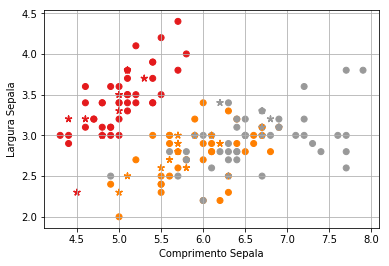

In [8]:
#Visualiza resultado da predição
X = x_treino[:, :2]
plt.scatter(X[:, 0], X[:, 1], c=y_treino, cmap=plt.cm.Set1)
X = x_predito[:, :2]
plt.scatter(X[:, 0], X[:, 1], c=y_predito, marker=(5, 2), cmap=plt.cm.Set1)
plt.xlabel('Comprimento Sepala')
plt.ylabel('Largura Sepala')
plt.grid(True)
plt.show()

In [9]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_valido,y_predito))  
print(classification_report(y_valido,y_predito))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
from kmeans import Kmeans

kmeans = Kmeans(3)
kmeans.set_elementos(iris.data)
dados_kmeans = kmeans.agrupa(50) #passa quantidade de iterações

In [21]:
#Visualiza resultado do kmeans
x = []
y = []
classe = []
for i in range(len(dados_kmeans)):
    #as duas primeiras características
    x.append(dados_kmeans[i][0][0])
    y.append(dados_kmeans[i][0][1])
    classe.append(dados_kmeans[i][1])
# X = X[:, :2] 
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
# plt.xlabel('Comprimento Sepala')
# plt.ylabel('Largura Sepala')
# plt.grid(True)
# plt.show()

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

TypeError: list indices must be integers or slices, not tuple